In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

csv_path = "medical_xai_dataset.csv"  

df = pd.read_csv(csv_path)

In [5]:
df.head() 

,Age,BMI,Glucose,BloodPressure,Insulin,HeartRate,Cholesterol,DiseaseRisk
0,69,31.7,180,117,90,106,214,0
1,32,24.5,130,69,279,84,237,0
2,78,20.3,117,113,298,61,263,0
3,38,28.0,73,64,220,69,127,0
4,41,22.8,104,95,237,89,251,0


In [7]:
df.shape 

(120, 8)

In [9]:
df.columns  

Index(['Age', 'BMI', 'Glucose', 'BloodPressure', 'Insulin', 'HeartRate',
       'Cholesterol', 'DiseaseRisk'],
      dtype='object')

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = df.drop("DiseaseRisk", axis=1)
y = df["DiseaseRisk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall   :", round(recall, 3))
print("F1-score :", round(f1, 3))


Accuracy : 0.444
Precision: 0.444
Recall   : 0.706
F1-score : 0.545


The model achieved an accuracy of 44.4%, showing that overall prediction performance is low. Precision of 44.4% indicates that many positive predictions were incorrect. However, the recall value of 70.6% shows that the model successfully identified most actual positive cases, which is important in healthcare-related studies. The F1-score of 54.5% reflects a moderate balance between precision and recall, suggesting that while the model captures positive cases well, it needs improvement to reduce false predictions.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [20]:
X = df.drop("DiseaseRisk", axis=1)
y = df["DiseaseRisk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [24]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression
Confusion Matrix:
 [[ 4 15]
 [ 5 12]]


In [34]:
X = df.drop("DiseaseRisk", axis=1)
y = df["DiseaseRisk"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
dt_model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

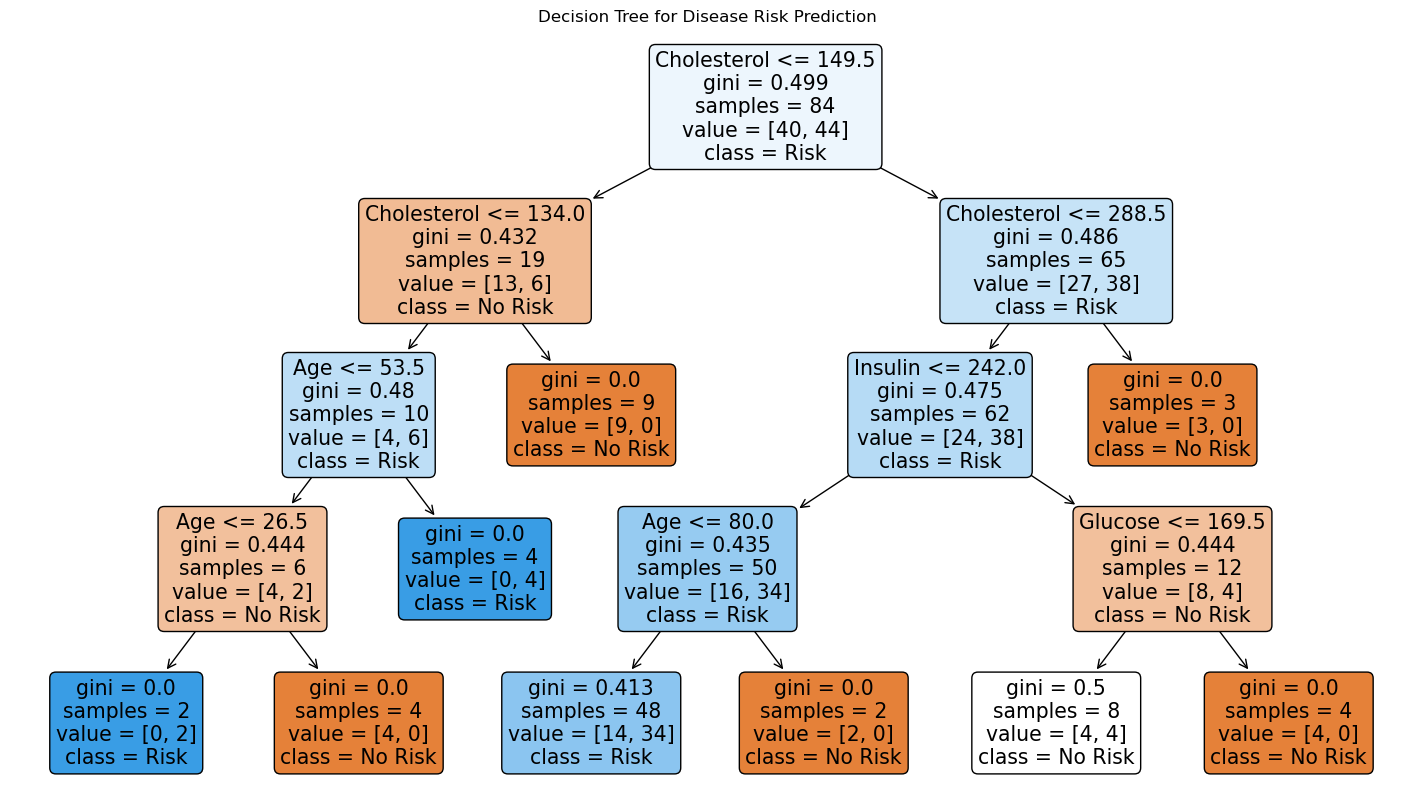

In [50]:
plt.figure(figsize=(18,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Risk", "Risk"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Disease Risk Prediction")
plt.show()


In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
import gradio as gr

In [54]:
X = df.drop("DiseaseRisk", axis=1)
y = df["DiseaseRisk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

def predict_disease(Age, BMI, Glucose, BloodPressure, Insulin, HeartRate, Cholesterol):
    input_data = pd.DataFrame([[Age, BMI, Glucose, BloodPressure, Insulin, HeartRate, Cholesterol]],
                              columns=X.columns)
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][prediction]
    return {"Prediction": int(prediction), "Probability": round(probability, 2)}

iface = gr.Interface(
    fn=predict_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Glucose"),
        gr.Number(label="BloodPressure"),
        gr.Number(label="Insulin"),
        gr.Number(label="HeartRate"),
        gr.Number(label="Cholesterol")
    ],
    outputs=[
        gr.Label(label="Prediction"),
        gr.Label(label="Probability")
    ],
    title="Disease Risk Prediction using Logistic Regression",
    description="Enter patient data to predict the risk of disease."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [56]:
# fastapi_app.py
from fastapi import FastAPI
from pydantic import BaseModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = df.drop("DiseaseRisk", axis=1)
y = df["DiseaseRisk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

class PatientData(BaseModel):
    Age: int
    BMI: float
    Glucose: int
    BloodPressure: int
    Insulin: int
    HeartRate: int
    Cholesterol: int

app = FastAPI(title="Disease Risk Prediction API")

@app.post("/predict/")
def predict_disease(data: PatientData):
    input_df = pd.DataFrame([data.dict()])
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][prediction]
    return {"Prediction": int(prediction), "Probability": round(probability, 2)}




In [58]:
# app.py
from flask import Flask, render_template, request
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

app = Flask(__name__)

X = df.drop("DiseaseRisk", axis=1)
y = df["DiseaseRisk"]

# Train Logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Home route with input form
@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        # Get input values from form
        Age = int(request.form['Age'])
        BMI = float(request.form['BMI'])
        Glucose = int(request.form['Glucose'])
        BloodPressure = int(request.form['BloodPressure'])
        Insulin = int(request.form['Insulin'])
        HeartRate = int(request.form['HeartRate'])
        Cholesterol = int(request.form['Cholesterol'])
        
        # Prepare input
        input_df = pd.DataFrame([[Age, BMI, Glucose, BloodPressure, Insulin, HeartRate, Cholesterol]],
                                columns=X.columns)
        
        # Prediction
        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0][prediction]
        
        return render_template('result.html', prediction=int(prediction), probability=round(probability, 2))
    
    return render_template('index.html')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

D:\anacoda file\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
